In [102]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

In [85]:
df = pd.read_csv('/Users/jacksonsorenson/Documents/Pyhton Projects/Market Research Project/Cleaned CSV/cleaned_marketing_campaign.csv')
df.head()

,ID,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,Complain,Z_CostContact,Z_Revenue,Response,Age,Total_Spend,Total_Children,Customer_Tenure,Avg_Monthly_Spend,Recency_Days
0,5524,Graduation,Single,58138.0,0,0,2012-09-04,58,635,88,...,0,3,11,1,67,1617,0,149.900000,10.787191,58
1,2174,Graduation,Single,46344.0,1,1,2014-03-08,38,11,1,...,0,3,11,0,70,27,2,131.566667,0.205219,38
2,4141,Graduation,Together,71613.0,0,0,2013-08-21,26,426,49,...,0,3,11,0,59,776,0,138.200000,5.615051,26
3,6182,Graduation,Together,26646.0,1,0,2014-02-10,26,11,4,...,0,3,11,0,40,53,1,132.433333,0.400201,26
4,5324,Phd,Married,58293.0,1,0,2014-01-19,94,173,43,...,0,3,11,0,43,422,1,133.166667,3.168961,94


In [86]:
# Features I will be USing in K-Mean Clustering
features = ['Age', 'Income', 'Total_Spend', 'Avg_Monthly_Spend', 'Recency_Days', 'Customer_Tenure']
X = df[features]

In [87]:
# Scale the Data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

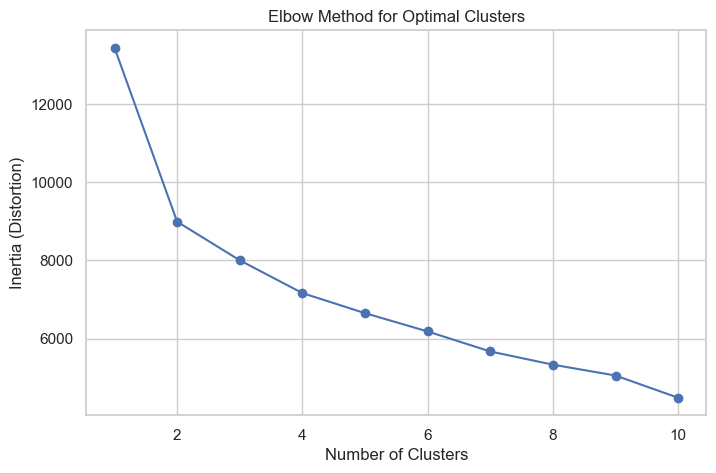

In [88]:
# Using the Elbow Method to see how Many Groups to Use for Segmentation
def plot_elbow_method(data, max_clusters=10):
    distortions = []
    for k in range(1, max_clusters + 1):
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(data)
        distortions.append(kmeans.inertia_) 

    plt.figure(figsize=(8, 5))
    plt.plot(range(1, max_clusters + 1), distortions, marker='o')
    plt.title('Elbow Method for Optimal Clusters')
    plt.xlabel('Number of Clusters')
    plt.ylabel('Inertia (Distortion)')
    plt.show()

plot_elbow_method(X_scaled, max_clusters=10)

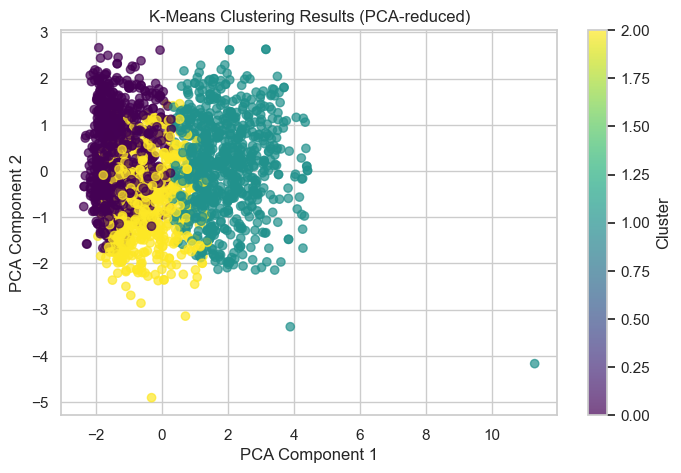

In [89]:
# Running K-Mean Clustering Using 3 Cluster Groups
optimal_clusters = 3 
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)

# Visualize clusters in a 2D scatter plot using PCA for dimensionality reduction
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(8, 5))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=df['Cluster'], cmap='viridis', alpha=0.7)
plt.title('K-Means Clustering Results (PCA-reduced)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar(label='Cluster')
plt.show()

               Age        Income  Total_Spend  Avg_Monthly_Spend  Recency_Days
Cluster                                                                       
0        47.004566  34938.066210   151.586758           1.078056     47.922374
1        55.765847  74229.377102  1324.711514           9.426939     49.918499
2        66.585448  49116.769036   338.741117           2.434870     49.810491


/var/folders/ty/kkyy7c9s4059czrtyxg_0mz40000gn/T/ipykernel_9548/2420493793.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bars = sns.barplot(
/var/folders/ty/kkyy7c9s4059czrtyxg_0mz40000gn/T/ipykernel_9548/2420493793.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bars = sns.barplot(
/var/folders/ty/kkyy7c9s4059czrtyxg_0mz40000gn/T/ipykernel_9548/2420493793.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bars = sns.barplot(
/var/folders/ty/kkyy7c9s4059czrtyxg_0mz40000gn/T/ipykernel_9548/2420493793.py:13: FutureWarning: 

Passing `palette` without assigning `hue

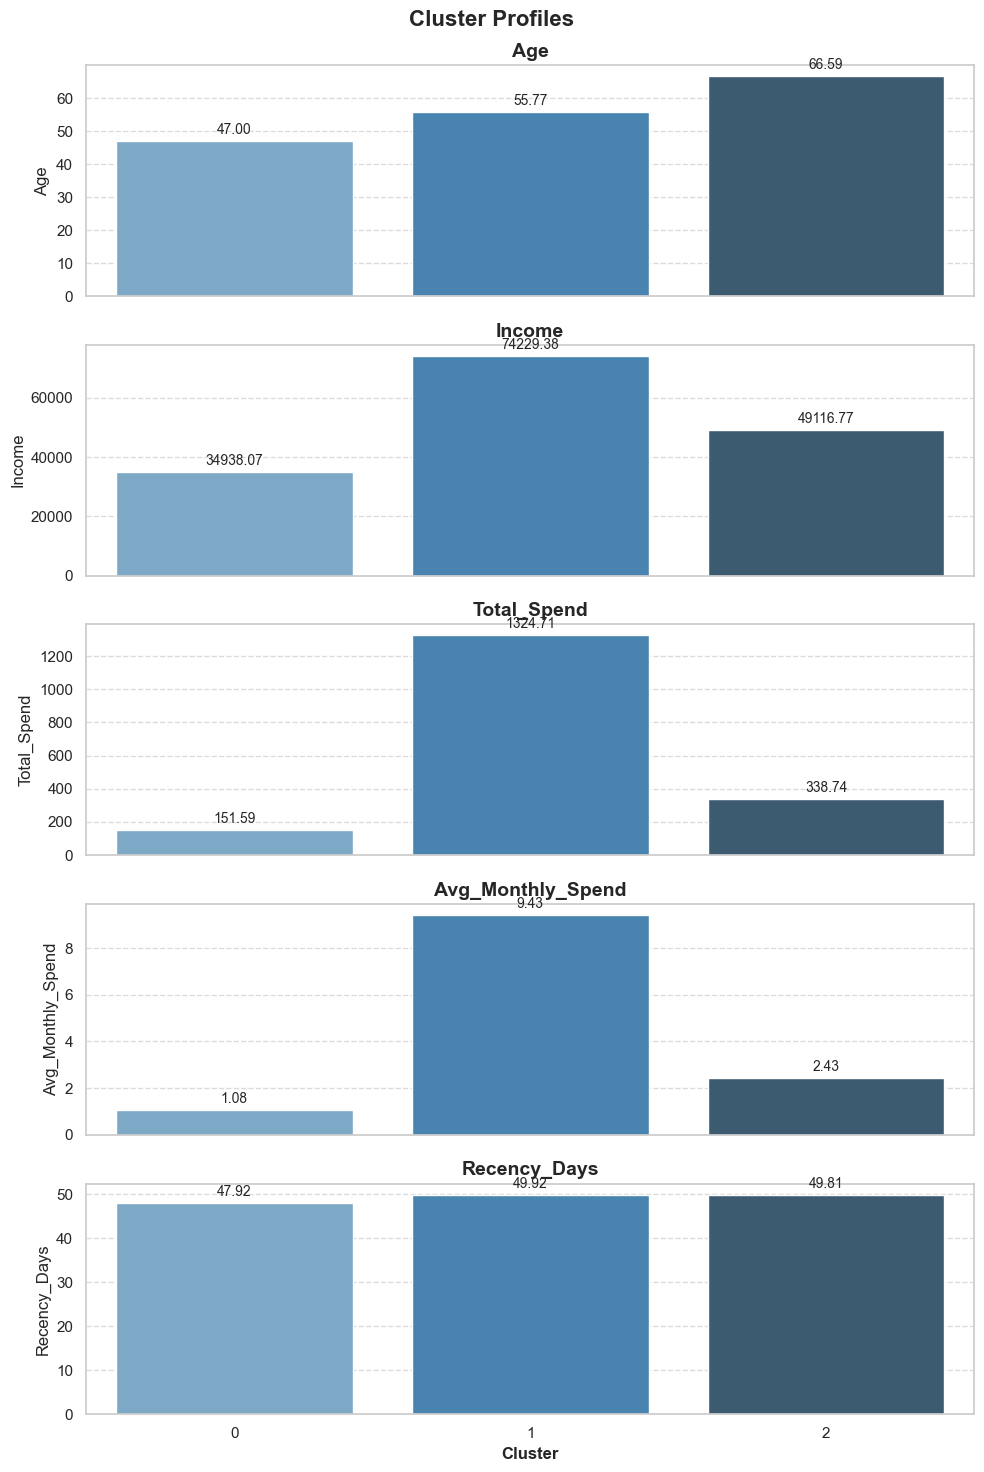

In [90]:
# Visualize Custoemr Profiles and SUbplot Each Factor in ORder for Comparison

cluster_profile = df.groupby('Cluster')[['Age', 'Income', 'Total_Spend', 'Avg_Monthly_Spend', 'Recency_Days']].mean()
print(cluster_profile)

sns.set_theme(style="whitegrid")

metrics = ['Age', 'Income', 'Total_Spend', 'Avg_Monthly_Spend', 'Recency_Days']

fig, axes = plt.subplots(len(metrics), 1, figsize=(10, 15), sharex=True)

for i, metric in enumerate(metrics):
    bars = sns.barplot(
        x=cluster_profile.index, 
        y=cluster_profile[metric], 
        ax=axes[i], 
        palette="Blues_d"
    )
    axes[i].set_title(metric, fontsize=14, weight='bold')
    axes[i].set_ylabel(metric, fontsize=12)
    axes[i].grid(axis='y', linestyle='--', alpha=0.7)
    
    for bar in bars.patches:
        bars.annotate(f'{bar.get_height():.2f}', 
                      xy=(bar.get_x() + bar.get_width() / 2, bar.get_height()),
                      xytext=(0, 5),  
                      textcoords="offset points",
                      ha='center', fontsize=10)

plt.xlabel('Cluster', fontsize=12, weight='bold')
plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.suptitle('Cluster Profiles', fontsize=16, weight='bold')
plt.show()



In [91]:
# Feature Engineer Cluster as its own Data in the CSV

df['Cluster'] = df['Cluster'].astype('category')


In [113]:
# Defining Churn for Customers in the 3rd Quarter of not Purhcasing anything, Which is 74 Days
df['Churn'] = df['Recency_Days'].apply(lambda x: 1 if x > 74 else 0)


# Using Random Forrest Regression to See Which Customers will Churn or Not
# Using Age, Income, TotalSpend, Cluster
X = df[['Age', 'Income', 'Total_Spend', 'Cluster']]  # Example
y = df['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R^2 Score: {r2:.2f}")

print(model.score(X_test, y_test))


Mean Squared Error: 0.20
R^2 Score: -0.01
0.7291666666666666


In [93]:
# Using Confusion Matrix to see The Accuracy of Predictions, True, False, False Negative, False Positive
# 0 = Non-Churn
# 1 = Churn
y_pred = model.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


[[456  28]
 [154  34]]
              precision    recall  f1-score   support

           0       0.75      0.94      0.83       484
           1       0.55      0.18      0.27       188

    accuracy                           0.73       672
   macro avg       0.65      0.56      0.55       672
weighted avg       0.69      0.73      0.68       672



In [94]:
# Identifying Feature Importance to See what Fatcors Help Idetntify Churn
feature_importances = model.feature_importances_
importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances}).sort_values(by='Importance', ascending=False)
print(importance_df)


       Feature  Importance
1       Income    0.387610
2  Total_Spend    0.371119
0          Age    0.225176
3      Cluster    0.016095


In [95]:
# The Data is Imbalancedm so we need to Generate more Synthetic samples for our minority Churn Class
sm = SMOTE(random_state=42)
X_resampled, y_resampled = sm.fit_resample(X, y)


In [96]:
# Using GridsearchCV to Help Increase Random Forest Classifier Parameters
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}
grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5, scoring='f1')
grid_search.fit(X_train, y_train)
print(grid_search.best_params_)


{'max_depth': None, 'min_samples_split': 2, 'n_estimators': 100}


In [97]:
# Running the Random Forst Classifier with Optimal Parameters
optimized_model = RandomForestClassifier(
    max_depth=None, 
    min_samples_split=2, 
    n_estimators=100, 
    random_state=42
)
optimized_model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [98]:
# Results
y_pred_optimized = optimized_model.predict(X_test)
print("Accuracy:", optimized_model.score(X_test, y_test))
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_optimized))

# ANALYSIS
# No Change in Results with Optimal Parameters Through Gridsearch

Accuracy: 0.7291666666666666
              precision    recall  f1-score   support

           0       0.75      0.94      0.83       484
           1       0.55      0.18      0.27       188

    accuracy                           0.73       672
   macro avg       0.65      0.56      0.55       672
weighted avg       0.69      0.73      0.68       672



In [108]:
# More Feature Engineering For Churn Analysis

df['Campaign_Engagement'] = df[['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response']].sum(axis=1)
df['Spend_Income_Ratio'] = df['Total_Spend'] / df['Income']

df.head()




,ID,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,Total_Children,Customer_Tenure,Avg_Monthly_Spend,Recency_Days,Cluster,Churn,Recent_Spend,Spend_Trend,Campaign_Engagement,Spend_Income_Ratio
0,5524,Graduation,Single,58138.0,0,0,2012-09-04,58,635,88,...,0,149.900000,10.787191,58,1,0,1617,149.900000,1,0.027813
1,2174,Graduation,Single,46344.0,1,1,2014-03-08,38,11,1,...,2,131.566667,0.205219,38,2,0,27,131.566667,0,0.000583
2,4141,Graduation,Together,71613.0,0,0,2013-08-21,26,426,49,...,0,138.200000,5.615051,26,1,0,776,138.200000,0,0.010836
3,6182,Graduation,Together,26646.0,1,0,2014-02-10,26,11,4,...,1,132.433333,0.400201,26,0,0,53,132.433333,0,0.001989
4,5324,Phd,Married,58293.0,1,0,2014-01-19,94,173,43,...,1,133.166667,3.168961,94,0,1,0,0.000000,0,0.007239


In [111]:

# Define features (X) and target (y)
X = df[['Spend_Income_Ratio', 'Income', 'Total_Spend', 'Age']]  # Features
y = df['Churn']  # Target variable for regression

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define and train the Random Forest Regressor with optimal parameters
optimal_model = RandomForestRegressor(
    n_estimators=100,  # Optimal number of trees
    max_depth=None,    # No restriction on tree depth
    min_samples_split=2,  # Minimum samples required to split a node
    random_state=42
)
optimal_model.fit(X_train, y_train)

# Predict on the test set
y_pred = optimal_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R^2 Score: {r2:.2f}")

Mean Squared Error: 0.20
R^2 Score: -0.01


In [112]:
# Feature Importance
feature_importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': optimal_model.feature_importances_
}).sort_values(by='Importance', ascending=False)
print(feature_importances)

              Feature  Importance
1              Income    0.308117
0  Spend_Income_Ratio    0.254370
2         Total_Spend    0.238210
3                 Age    0.199303
